In [1]:
from keras.datasets import imdb

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels)
  = imdb.load_data(num_words=10000)

In [10]:
print(max([max(sequence) for sequence in train_data]))

9999


In [11]:
print(min([min(sequence) for sequence in train_data]))

1


In [12]:
x = list(range(10))
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
y = [a for a in x]
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
y = [a * a for a in x if (a % 2) == 0]
print(y)

[0, 4, 16, 36, 64]


In [21]:
print(train_data.shape)
print(len(train_data[0]))
print(len(train_data[1]))
print(len(train_data[2]))

(25000,)
218
189
141


In [22]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [35]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[3]]) 
print(decoded_review)
print(train_labels[3])

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

In [46]:
import numpy as np

# Bag of word model
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        #for i2 in sequence:
        #    results[i, i2] = 1.

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print(x_train[0].shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)


In [47]:
def relu(x):
    return max(0, x)
    
print(relu(-1.0))
print(relu(-0.5))
print(relu(0.0))
print(relu(0.5))
print(relu(1.0))

0
0
0
0.5
1.0


In [51]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [73]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [55]:
y_train = train_labels.astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


In [74]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 146us/step - loss: 0.5936 - acc: 0.7048 - val_loss: 0.5059 - val_acc: 0.8149
Epoch 2/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.4148 - acc: 0.8818 - val_loss: 0.3791 - val_acc: 0.8816
Epoch 3/10
15000/15000 [==============================] - 2s 103us/step - loss: 0.3003 - acc: 0.9177 - val_loss: 0.3224 - val_acc: 0.8827
Epoch 4/10
15000/15000 [==============================] - 2s 101us/step - loss: 0.2282 - acc: 0.9347 - val_loss: 0.3208 - val_acc: 0.8723
Epoch 5/10
15000/15000 [==============================] - 1s 98us/step - loss: 0.1808 - acc: 0.9473 - val_loss: 0.2966 - val_acc: 0.8818
Epoch 6/10
15000/15000 [==============================] - 1s 98us/step - loss: 0.1482 - acc: 0.9558 - val_loss: 0.2949 - val_acc: 0.8830
Epoch 7/10
15000/15000 [==============================] - 2s 103us/step - loss: 0.1255 - acc: 0.9638 - val_loss: 0.2896 - va

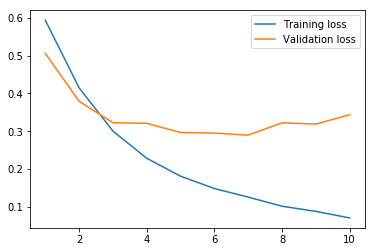

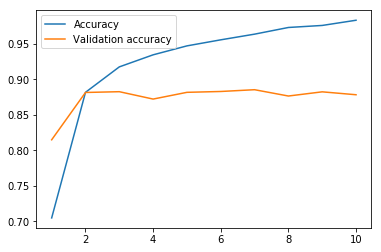

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

#print(history.history["val_loss"])
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")

plt.legend()

plt.show()

plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, label="Accuracy")
plt.plot(epochs, val_acc_values, label="Validation accuracy")
plt.legend()
plt.show()